In [1]:
import numpy as np
from disba import EigenFunction, PhaseDispersion, GroupDispersion, PhaseSensitivity, GroupSensitivity, Ellipticity, EllipticitySensitivity
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
# Lanza et al. 2022 St Ursanne earthquake study

# Zb (bottom of layer depth), Vp, Vs, density, Qp, Qs, radius_earth
vmod = np.array(
    [
        [.000,.33180,.00000,.001300,1000.000,-1.000,6371.000],
        [0.220,4.3350,2.47714,2.750000,50.000,100.000,6336.600],
        [0.610,3.1340,1.79086,2.150000,50.000,100.000,6336.600],
        [0.670,3.1630,1.80743,2.850000,50.000,100.000,6336.600],
        [0.890,3.1350,1.79143,2.750000,50.000,100.000,6336.600],
        [1.220,4.4940,2.56800,2.250000,50.000,100.000,6336.600],
        [1.660,3.9270,2.31000,2.250000,50.000,100.000,6336.600],
        [10.000,6.00000,3.50000,2.600000,100.000,200.000,6351.000],
        [15.000,6.10000,3.57000,2.700000,200.000,200.000,6351.000],
        [20.000,6.20000,3.63000,2.700000,200.000,200.000,6351.000],
        [25.000,6.30000,3.69000,2.800000,200.000,200.000,6336.600],
        [30.000,6.53158,3.76822,2.885979,200.000,200.000,6336.600],
        [0.0,8.11369,4.51704,3.347689,200.000,200.000,6293.633]
    ]
)


# Velocity model
# thickness, Vp, Vs, density
# km, km/s, km/s, g/cm3
velocity_model = vmod[1:,:4]
# print(velocity_model)
# print(velocity_model.shape)
# print(len(np.diff(vmod[:,0])))
# print(np.diff(vmod[:,0]))
velocity_model[:,0] = np.diff(vmod[:,0])
velocity_model[-1,0] = 5
print(velocity_model)


[[0.22     4.335    2.47714  2.75    ]
 [0.39     3.134    1.79086  2.15    ]
 [0.06     3.163    1.80743  2.85    ]
 [0.22     3.135    1.79143  2.75    ]
 [0.33     4.494    2.568    2.25    ]
 [0.44     3.927    2.31     2.25    ]
 [8.34     6.       3.5      2.6     ]
 [5.       6.1      3.57     2.7     ]
 [5.       6.2      3.63     2.7     ]
 [5.       6.3      3.69     2.8     ]
 [5.       6.53158  3.76822  2.885979]
 [5.       8.11369  4.51704  3.347689]]


In [3]:
velocity_model.shape

(12, 4)

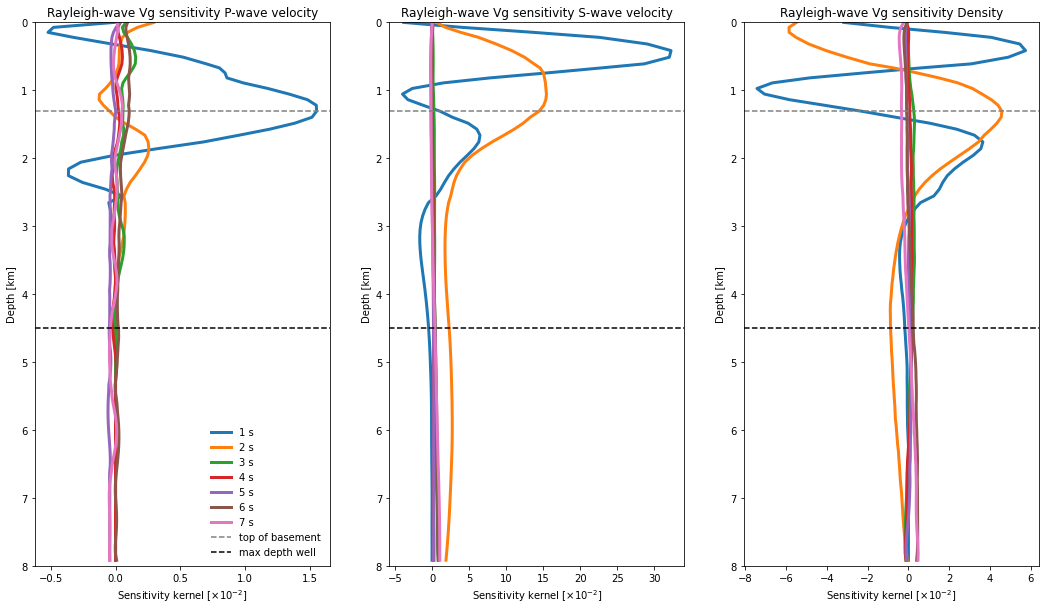

In [4]:
# Sensitivity kernel
ps = GroupSensitivity(*velocity_model.T)
ps.resample(0.1)
labels = {
    "thickness": "$\\partial c / \\partial d$",
    "velocity_p": "$\\partial c / \\partial \\alpha$",
    "velocity_s": "$\\partial c / \\partial \\beta$",
    "density": "$\\partial c / \\partial \\rho$",
}

labels = {
    "thickness": "thickness",
    "velocity_p": "P-wave velocity",
    "velocity_s": "S-wave velocity",
    "density": "Density",
}

zmax = 8.
fig, axs = plt.subplots(1, 3, figsize=(18,10),sharex=False)
wave = "rayleigh"
for period in np.arange(1,8,1):
    
    for _i, parameter in enumerate(["velocity_p", "velocity_s", "density"]):#, "thickness"]):
        sk = ps(period, mode=1, wave=wave, parameter=parameter)
        imax = np.argwhere(sk.depth>zmax)[0][0]
        axs[_i].plot(savgol_filter(sk.kernel[:imax] * 1.0e2, 21, 5), sk.depth[:imax], linewidth=3, label=f"{period} s")
        axs[_i].set_title(f"{wave.capitalize()}-wave Vg sensitivity {labels[parameter]}")
        
for _i in range(3):
    axs[_i].set_xlabel("Sensitivity kernel [$\\times 10^{-2}$]")
    axs[_i].set_ylabel("Depth [km]")
#     axs[_i].set_xlim(-10.0, 10.0)
    axs[_i].set_ylim(0.0, zmax)
    axs[_i].axhline(1.3, ls="--", c="gray", label="top of basement")
    axs[_i].axhline(4.5, ls="--", c="k", label="max depth well")
    axs[_i].invert_yaxis()
axs[0].legend(frameon=False)

plt.show()
# fig.savefig(f"figs/Groupkernel_{wave}.png", transparent=False, bbox_inches="tight")
plt.close()



[1.         1.02453386 1.04966963 1.07542208 1.10180633 1.12883789
 1.15653264 1.18490685 1.21397719 1.24376073 1.27427499 1.30553787
 1.33756775 1.37038345 1.40400425 1.43844989 1.47374062 1.50989716
 1.54694077 1.58489319]


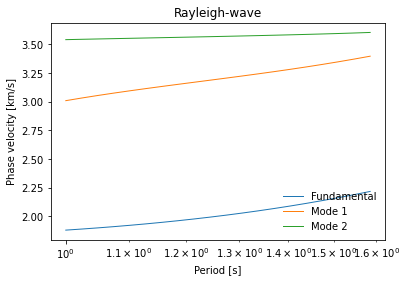

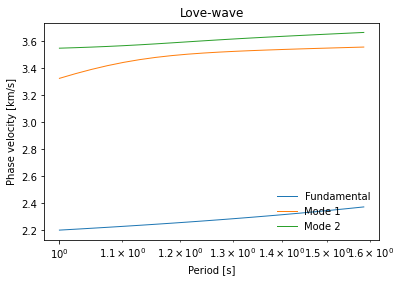

In [5]:

t = np.logspace(0.0, 0.2, 20)
print(t)

############# PHASE DISPERSION
pd = PhaseDispersion(*velocity_model.T)
labels = {
    0: "Fundamental",
    1: "Mode 1",
    2: "Mode 2",
}
for wave in ["rayleigh", "love"]:
    fig = plt.figure()

    for i in range(3):
        cp = pd(t, mode=i, wave=wave)
        plt.semilogx(cp.period, cp.velocity, linewidth=1, label=labels[i])

    plt.title(f"{wave.capitalize()}-wave")
    plt.xlabel("Period [s]")
    plt.ylabel("Phase velocity [km/s]")
#     plt.ylim(3.2, 4.8)
    plt.legend(loc=4, frameon=False)

################# GROUP DISPERSION

# # Dispersion curve
# pd = GroupDispersion(*velocity_model.T)
# labels = {
#     0: "Fundamental",
#     1: "Mode 1",
#     2: "Mode 2",
# }
# for wave in ["rayleigh", "love"]:
#     fig = plt.figure()

#     for i in range(3):
#         cp = pd(t, mode=i, wave=wave)
#         plt.semilogx(cp.period, cp.velocity, linewidth=1, label=labels[i])

#     plt.title(f"{wave.capitalize()}-wave")
#     plt.xlabel("Period [s]")
#     plt.ylabel("Group velocity [km/s]")
# #     plt.ylim(3.2, 4.8)
#     plt.legend(loc=4, frameon=False)

# #     fig.savefig(f"sample_{wave}.svg", transparent=True, bbox_inches="tight")


#####################


# # Ellipticity
# ell = Ellipticity(*velocity_model.T)
# rel = ell(t, mode=0)

# fig = plt.figure()

# plt.semilogx(rel.period, rel.ellipticity, linewidth=1)
# plt.title("Ellipticity")
# plt.xlabel("Period [s]")
# plt.ylabel("Ellipticity [H/V]")
# # plt.ylim(0.55, 0.85)




In [6]:
# Wavelengths
t = np.arange(0.2, 10, 0.2)
pd = PhaseDispersion(*velocity_model.T)
cp = pd(t, mode=0, wave="rayleigh")

# print(cp)

for T, vphase in zip(cp.period, cp.velocity):
    print(f"T = {T:.1f} s, vphase = {vphase:.2f}: 1.5*lambda = {1.5*vphase*T:.2f} km: 3*lambda = {3*vphase*T:.2f}")

T = 0.2 s, vphase = 1.86: 1.5*lambda = 0.56 km: 3*lambda = 1.12
T = 0.4 s, vphase = 1.87: 1.5*lambda = 1.12 km: 3*lambda = 2.24
T = 0.6 s, vphase = 1.81: 1.5*lambda = 1.63 km: 3*lambda = 3.26
T = 0.8 s, vphase = 1.82: 1.5*lambda = 2.19 km: 3*lambda = 4.37
T = 1.0 s, vphase = 1.88: 1.5*lambda = 2.82 km: 3*lambda = 5.64
T = 1.2 s, vphase = 1.97: 1.5*lambda = 3.54 km: 3*lambda = 7.09
T = 1.4 s, vphase = 2.09: 1.5*lambda = 4.38 km: 3*lambda = 8.76
T = 1.6 s, vphase = 2.23: 1.5*lambda = 5.35 km: 3*lambda = 10.69
T = 1.8 s, vphase = 2.38: 1.5*lambda = 6.42 km: 3*lambda = 12.85
T = 2.0 s, vphase = 2.52: 1.5*lambda = 7.55 km: 3*lambda = 15.11
T = 2.2 s, vphase = 2.63: 1.5*lambda = 8.67 km: 3*lambda = 17.34
T = 2.4 s, vphase = 2.71: 1.5*lambda = 9.74 km: 3*lambda = 19.48
T = 2.6 s, vphase = 2.76: 1.5*lambda = 10.78 km: 3*lambda = 21.56
T = 2.8 s, vphase = 2.81: 1.5*lambda = 11.79 km: 3*lambda = 23.57
T = 3.0 s, vphase = 2.84: 1.5*lambda = 12.78 km: 3*lambda = 25.55
T = 3.2 s, vphase = 2.87: 1.5

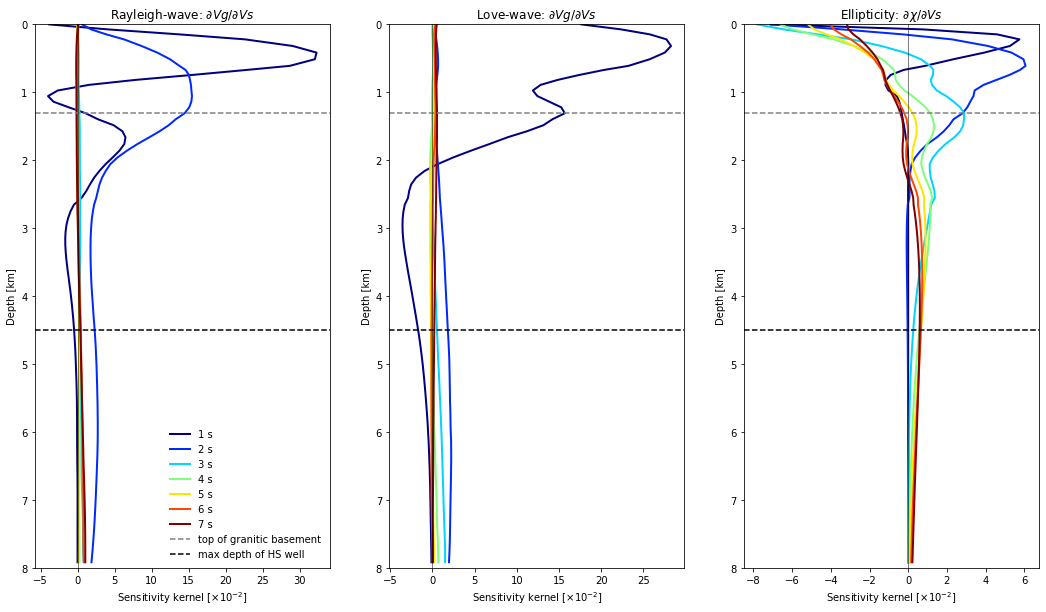

In [7]:
import numpy as np
from disba import PhaseSensitivity, GroupSensitivity, EllipticitySensitivity
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import matplotlib.pylab as pl


# Plot params
zmax = 8.
periods =  np.arange(1,8,1)
colors = pl.cm.jet(np.linspace(0,1,len(periods)))
parameter = "velocity_s"

# Sensitivity kernel
ps = GroupSensitivity(*velocity_model.T)
# ps = PhaseSensitivity(*velocity_model.T)
ps.resample(0.1)
mode=1
es = EllipticitySensitivity(*velocity_model.T)
es.resample(0.1)

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18,10),sharex=False)
for p, period in enumerate(periods):
    
    for _i, wave in enumerate(["rayleigh", "love"]):
        sk = ps(period, mode=mode, wave=wave, parameter=parameter)
        imax = np.argwhere(sk.depth>zmax)[0][0]
        axs[_i].plot(savgol_filter(sk.kernel[:imax] * 1.0e2, 21, 5), sk.depth[:imax], linewidth=2, 
                     label=f"{period} s", color=colors[p])
#         axs[_i].set_title(f"{wave.capitalize()}-wave Vg sensitivity to Vs")
        axs[_i].set_title(f"{wave.capitalize()}-wave: $\\partial Vg / \\partial Vs$")
    
    # ellipticity
    sk = es(period, mode=0, parameter=parameter)
    imax = np.argwhere(sk.depth>zmax)[0][0]
    axs[2].plot(savgol_filter(sk.kernel[:imax] * 1.0e2, 21, 5), sk.depth[:imax], linewidth=2, 
                 label=f"{period} s", color=colors[p])
    axs[2].set_title(f"Ellipticity: $\\partial \\chi / \\partial Vs$")
    
for _i in range(3):
    axs[_i].set_xlabel("Sensitivity kernel [$\\times 10^{-2}$]")
    axs[_i].set_ylabel("Depth [km]")
#     axs[_i].set_xlim(-10.0, 10.0)
    axs[_i].set_ylim(0.0, zmax)
    axs[_i].axhline(1.3, ls="--", c="gray", label="top of granitic basement")
    axs[_i].axhline(4.5, ls="--", c="k", label="max depth of HS well")
    axs[_i].axvline(0, ls="-", c="k", lw=0.5)
    axs[_i].invert_yaxis()
axs[0].legend(frameon=False)


fig.savefig(f"hautesorne_kernel_Vs_rayleigh_mode1_love_ellip.png", transparent=False, bbox_inches="tight")
plt.show()
plt.close()

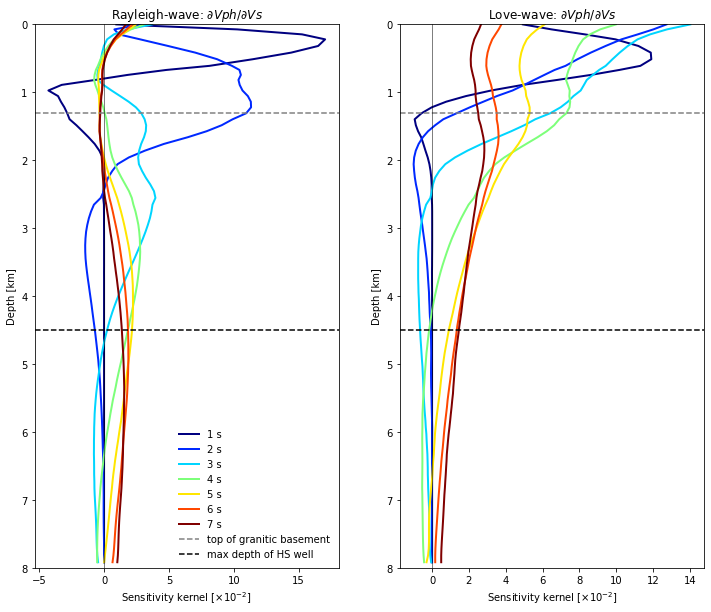

In [9]:
import numpy as np
from disba import PhaseSensitivity, GroupSensitivity, EllipticitySensitivity
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import matplotlib.pylab as pl


# # Plot params
# zmax = 8.
# periods =  np.arange(1,8,1)
# colors = pl.cm.jet(np.linspace(0,1,len(periods)))
# parameter = "velocity_s"

# # Sensitivity kernel
# ps = PhaseSensitivity(*velocity_model.T)
# ps.resample(0.1)


# Plot
fig, axs = plt.subplots(1, 2, figsize=(12,10),sharex=False)
for p, period in enumerate(periods):
    
    for _i, wave in enumerate(["rayleigh", "love"]):
        sk = ps(period, mode=0, wave=wave, parameter=parameter)
        imax = np.argwhere(sk.depth>zmax)[0][0]
        axs[_i].plot(savgol_filter(sk.kernel[:imax] * 1.0e2, 21, 5), sk.depth[:imax], linewidth=2, 
                     label=f"{period} s", color=colors[p])
#         axs[_i].set_title(f"{wave.capitalize()}-wave Vg sensitivity to Vs")
        axs[_i].set_title(f"{wave.capitalize()}-wave: $\\partial Vph / \\partial Vs$")
    
    
for _i in range(2):
    axs[_i].set_xlabel("Sensitivity kernel [$\\times 10^{-2}$]")
    axs[_i].set_ylabel("Depth [km]")
#     axs[_i].set_xlim(-10.0, 10.0)
    axs[_i].set_ylim(0.0, zmax)
    axs[_i].axhline(1.3, ls="--", c="gray", label="top of granitic basement")
    axs[_i].axhline(4.5, ls="--", c="k", label="max depth of HS well")
    axs[_i].axvline(0, ls="-", c="k", lw=0.5)
    axs[_i].invert_yaxis()
axs[0].legend(frameon=False)


fig.savefig(f"2Lanza2022vmod_phasevelocity_kernel_Rayleigh_Love.png", transparent=False, bbox_inches="tight")
plt.show()
plt.close()

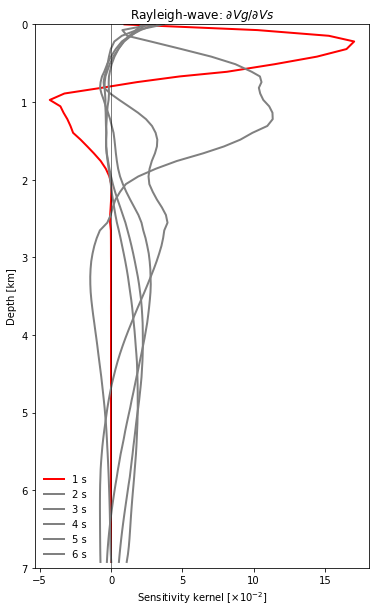

In [10]:
import numpy as np
from disba import PhaseSensitivity, GroupSensitivity, EllipticitySensitivity
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import matplotlib.pylab as pl


# Plot params
zmax = 7.
periods =  np.arange(1,7,1)
colors = pl.cm.jet(np.linspace(0,1,len(periods)))
parameter = "velocity_s"

# Sensitivity kernel
ps = GroupSensitivity(*velocity_model.T)
# ps = PhaseSensitivity(*velocity_model.T)
# ps = EllipticitySensitivity(*velocity_model.T)
ps.resample(0.1)

targetT = 1

# Plot
fig, ax = plt.subplots(1, 1, figsize=(6,10),sharex=False)
for p, period in enumerate(periods):
    
#     sk = ps(period, mode=0, parameter=parameter)
    sk = ps(period, mode=0, wave="rayleigh", parameter=parameter)
    imax = np.argwhere(sk.depth>zmax)[0][0]
    if period != targetT:
        color = "gray"
    else:
        color = "r" #colors[p]
    ax.plot(savgol_filter(sk.kernel[:imax] * 1.0e2, 21, 5), sk.depth[:imax], linewidth=2, 
                 label=f"{period} s", color=color)

ax.set_title(f"Rayleigh-wave: $\\partial Vg / \\partial Vs$")
# ax.set_title(f"Ellipticity") 
ax.set_xlabel("Sensitivity kernel [$\\times 10^{-2}$]")
ax.set_ylabel("Depth [km]")
ax.set_ylim(0.0, zmax)
# ax.axhline(1.3, ls="--", c="gray", label="top of basement")
#ax.axhline(4.5, ls="--", c="k", label="max depth of HS well")
ax.axvline(0, ls="-", c="k", lw=0.5)
ax.invert_yaxis()
ax.legend(frameon=False)

# fig.savefig(f"figs/Love_VG_kernel_Vs.png", transparent=False, bbox_inches="tight")
# fig.savefig(f"figs/Ellipticitykernel_Vs_rayleigh_love.png", transparent=False, bbox_inches="tight")
plt.show()
plt.close()

TypeError: _AxesBase.set_xlim() takes from 1 to 3 positional arguments but 4 were given

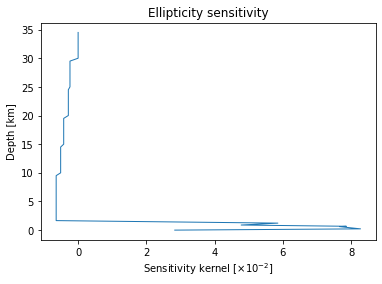

In [11]:
# Ellipticity sensitivity kernel
es = EllipticitySensitivity(*velocity_model.T)
es.resample(0.5)
labels = {
    "thickness": "$\\partial \\chi / \\partial d$",
    "velocity_p": "$\\partial \\chi / \\partial \\alpha$",
    "velocity_s": "$\\partial \\chi / \\partial \\beta$",
    "density": "$\\partial \\chi / \\partial \\rho$",
}

fig = plt.figure()

for parameter in ["thickness", "velocity_p", "velocity_s", "density"]:
    ek = es(20.0, mode=0, parameter=parameter)
    plt.plot(ek.kernel * 1.0e2, ek.depth, linewidth=1, label=labels[parameter])

    plt.title("Ellipticity sensitivity")
    plt.xlabel("Sensitivity kernel [$\\times 10^{-2}$]")
    plt.ylabel("Depth [km]")
    plt.xlim(-2.0, 2,0)
    plt.ylim(0.0, 90.0)
    plt.gca().invert_yaxis()
    plt.legend(loc=4, frameon=False)

fig.savefig("kernel_ellipticity.png", transparent=True, bbox_inches="tight")